________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-qqcno-__ipython-input__.get_data...
get_data()
_________________________________________________________get_data - 0.0s, 0.0min


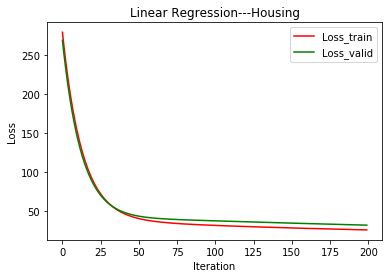

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.externals.joblib import Memory
from sklearn.model_selection import train_test_split

mem = Memory("./mycache")
#get dataset
@mem.cache
def get_data():
    data = load_svmlight_file("D:\Task\MachineLearning\Test\LR\LR__Housing\data\housing_scale")
    return data[0], data[1]


#divide the dataset into training set and validation set, the random state is 20
def spilt_data(X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)
    return x_train, x_test, y_train, y_test


#compute cost function
def computeCost(x, y, theta):
    loss =  (1 / (2 * x.shape[0])) * ((np.dot(x, theta) - y).transpose()*(np.dot(x, theta) - y))
    return np.sum(loss)

X, y = get_data()
X_train, x_test, y_train, y_test = spilt_data(X, y)

X_train =  X_train.todense()
x_test = x_test.todense()
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

#initialize the parameters
theta_array = np.zeros((X_train.shape[1], 1))

#set the learning rate and iterate number
leraning_rate = 0.01
iterate_number = 200

loss_train = []
loss_valid = []


for i in range(iterate_number):
    gradient = (1 / (X_train.shape[0])) * (X_train.transpose() * (X_train * theta_array - y_train))
    #print(gradient)
    theta_array = theta_array - leraning_rate * gradient
    loss_train.append(computeCost(X_train, y_train, theta_array))
    loss_valid.append(computeCost(x_test, y_test, theta_array))

#print("loss_train", loss_train)
#print("loss_valid", loss_valid)

#ploting the loss value
plt.plot(loss_train, color="r", label="Loss_train")
plt.plot(loss_valid, color="g",label="Loss_valid")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Linear Regression---Housing")
plt.legend()
plt.show()
